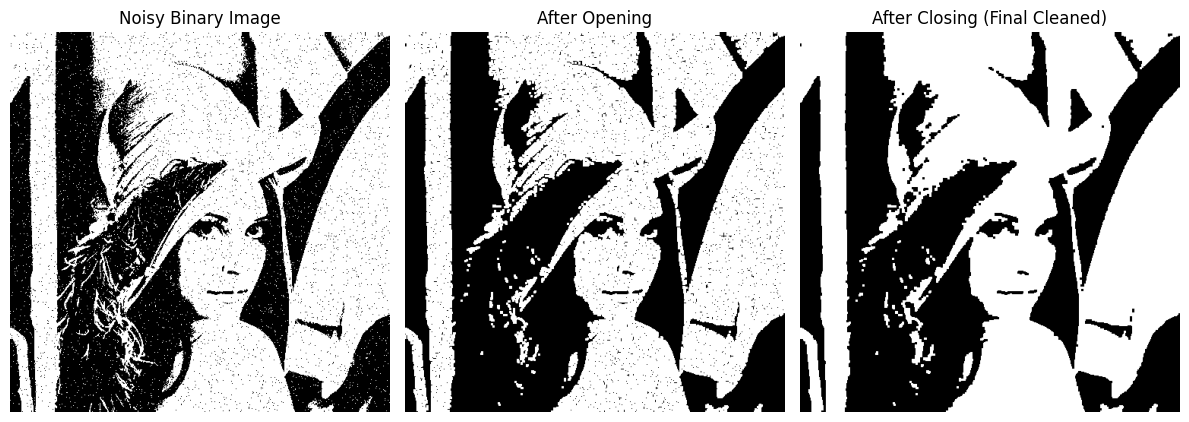

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# 1. Load image and convert to grayscale
# -----------------------------
image = cv2.imread("Lenna.png")

if image is None:
    raise FileNotFoundError("Image not found. Check the file path.")

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# -----------------------------
# 2. Add artificial salt & pepper noise (before threshold)
# -----------------------------
noise_prob = 0.02
noisy_gray = gray.copy()

rand = np.random.rand(*gray.shape)
noisy_gray[rand < noise_prob] = 0          # pepper
noisy_gray[rand > 1 - noise_prob] = 255    # salt

# Threshold → create noisy binary image
_, binary_noisy = cv2.threshold(noisy_gray, 0, 255,
                                cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# -----------------------------
# 3. Structuring element (3×3)
# -----------------------------
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))

# -----------------------------
# 4. Morphological cleaning
# Opening removes small white noise
# Closing fills small black holes
# -----------------------------
opened = cv2.morphologyEx(binary_noisy, cv2.MORPH_OPEN, kernel)
cleaned = cv2.morphologyEx(opened, cv2.MORPH_CLOSE, kernel)

# -----------------------------
# 5. Display
# -----------------------------
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.imshow(binary_noisy, cmap='gray')
plt.title("Noisy Binary Image")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(opened, cmap='gray')
plt.title("After Opening")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(cleaned, cmap='gray')
plt.title("After Closing (Final Cleaned)")
plt.axis("off")

plt.tight_layout()
plt.show()
